In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# !pip install matplotlib seaborn

In [46]:
import warnings
warnings.simplefilter("ignore")

In [47]:
np.zeros(1)

array([0.])

In [48]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,29840,INN29841,3,0,1,2,Meal Plan 1,0,Room_Type 4,42,2018,3,18,Online,0,0,0,182.7,1,Canceled
1,776,INN00777,1,0,0,3,Meal Plan 1,0,Room_Type 1,91,2018,9,14,Corporate,1,3,15,65.0,0,Not_Canceled
2,36097,INN36098,1,0,0,1,Meal Plan 1,0,Room_Type 1,33,2018,5,25,Online,0,0,0,108.9,0,Not_Canceled
3,16637,INN16638,1,0,0,2,Meal Plan 1,0,Room_Type 4,86,2018,10,26,Online,0,0,0,104.4,2,Not_Canceled
4,7009,INN07010,2,0,0,1,Meal Plan 2,0,Room_Type 1,100,2017,10,16,Online,0,0,0,108.0,0,Canceled


In [49]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  object 
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  object 
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_

In [50]:
df.shape

(29020, 18)

In [51]:
df.duplicated().sum()

np.int64(7753)

In [52]:
df.drop_duplicates(inplace=True)
df.shape

(21267, 18)

In [53]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    15179
Canceled         6088
Name: count, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21267 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21267 non-null  int64  
 1   no_of_children                        21267 non-null  int64  
 2   no_of_weekend_nights                  21267 non-null  int64  
 3   no_of_week_nights                     21267 non-null  int64  
 4   type_of_meal_plan                     21267 non-null  object 
 5   required_car_parking_space            21267 non-null  int64  
 6   room_type_reserved                    21267 non-null  object 
 7   lead_time                             21267 non-null  int64  
 8   arrival_year                          21267 non-null  int64  
 9   arrival_month                         21267 non-null  int64  
 10  arrival_date                          21267 non-null  int64  
 11  market_segment_type 

#### Our data is imbalanced

In [55]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [56]:
cat_cols = [
    'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 
    'market_segment_type', 'repeated_guest', 'booking_status'
]

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'
]

### DATA ANALYSIS

In [57]:
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,1,2,Meal Plan 1,0,Room_Type 4,42,2018,3,18,Online,0,0,0,182.7,1,Canceled
1,1,0,0,3,Meal Plan 1,0,Room_Type 1,91,2018,9,14,Corporate,1,3,15,65.0,0,Not_Canceled
2,1,0,0,1,Meal Plan 1,0,Room_Type 1,33,2018,5,25,Online,0,0,0,108.9,0,Not_Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 4,86,2018,10,26,Online,0,0,0,104.4,2,Not_Canceled
4,2,0,0,1,Meal Plan 2,0,Room_Type 1,100,2017,10,16,Online,0,0,0,108.0,0,Canceled


In [58]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes=[axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()

In [59]:
# num_plot_dist(data, num_cols)

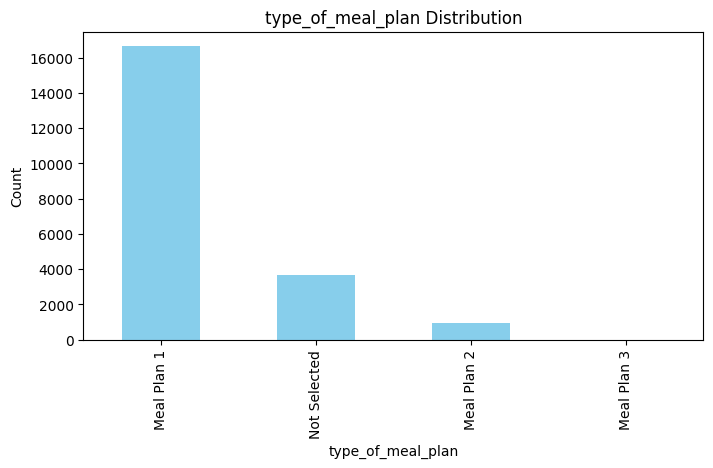

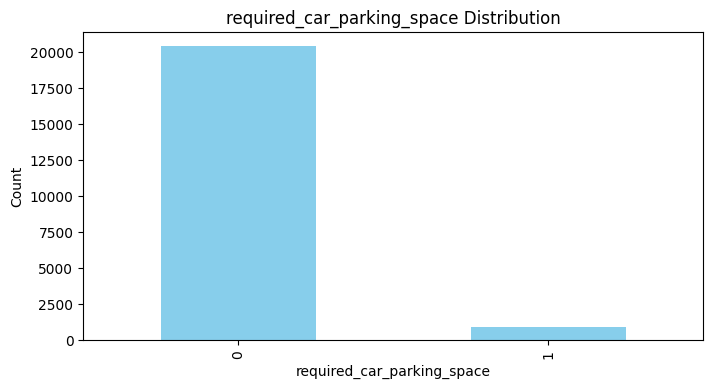

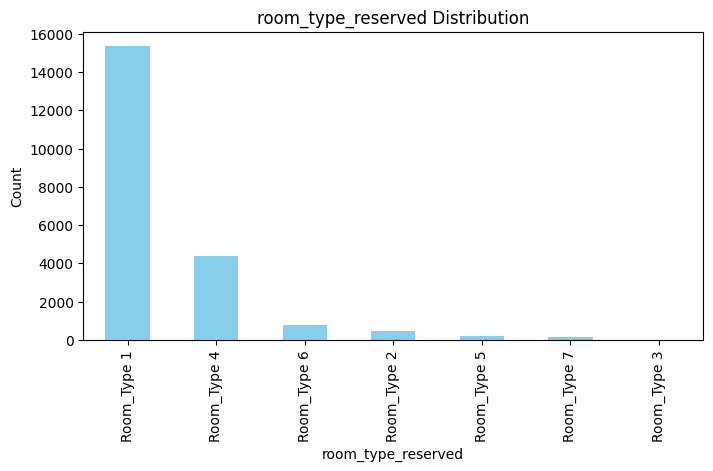

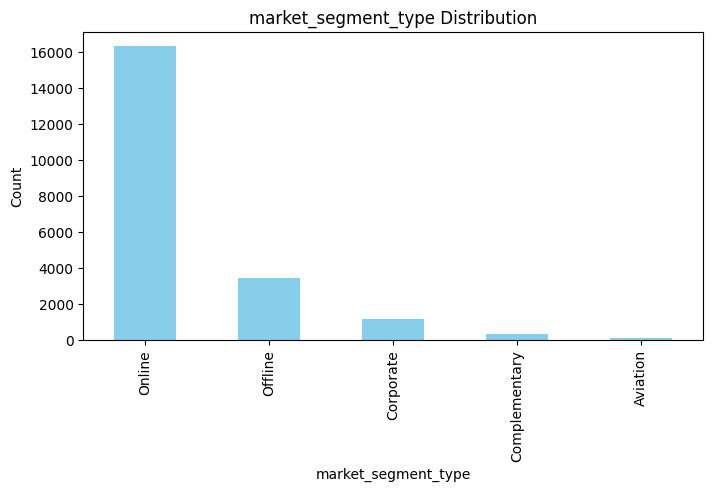

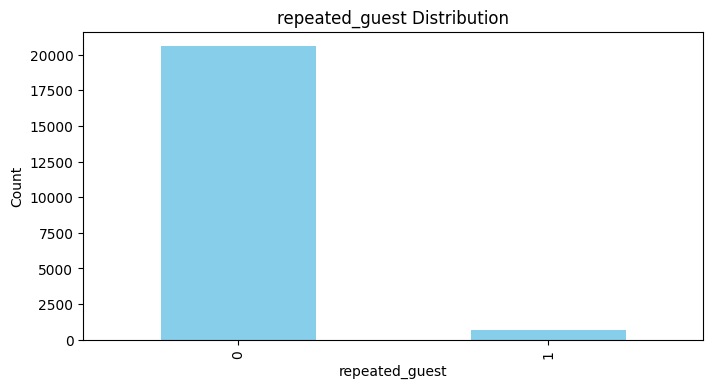

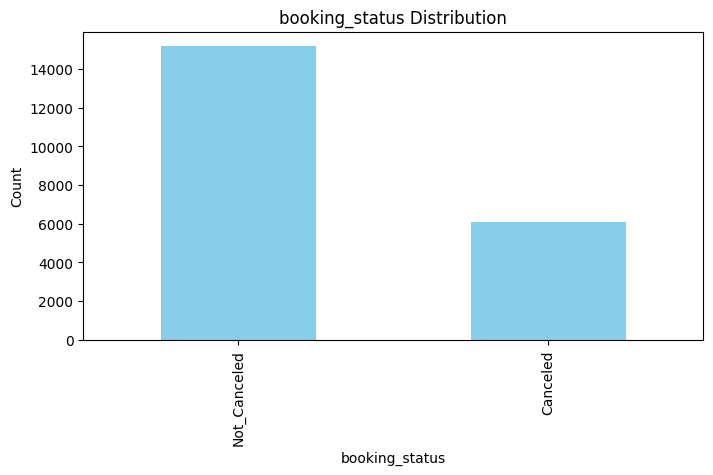

In [60]:
for cat_feature in cat_cols:
    plt.figure(figsize=(8,4))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

In [61]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} vs {target}")

    plt.tight_layout()
    plt.show()

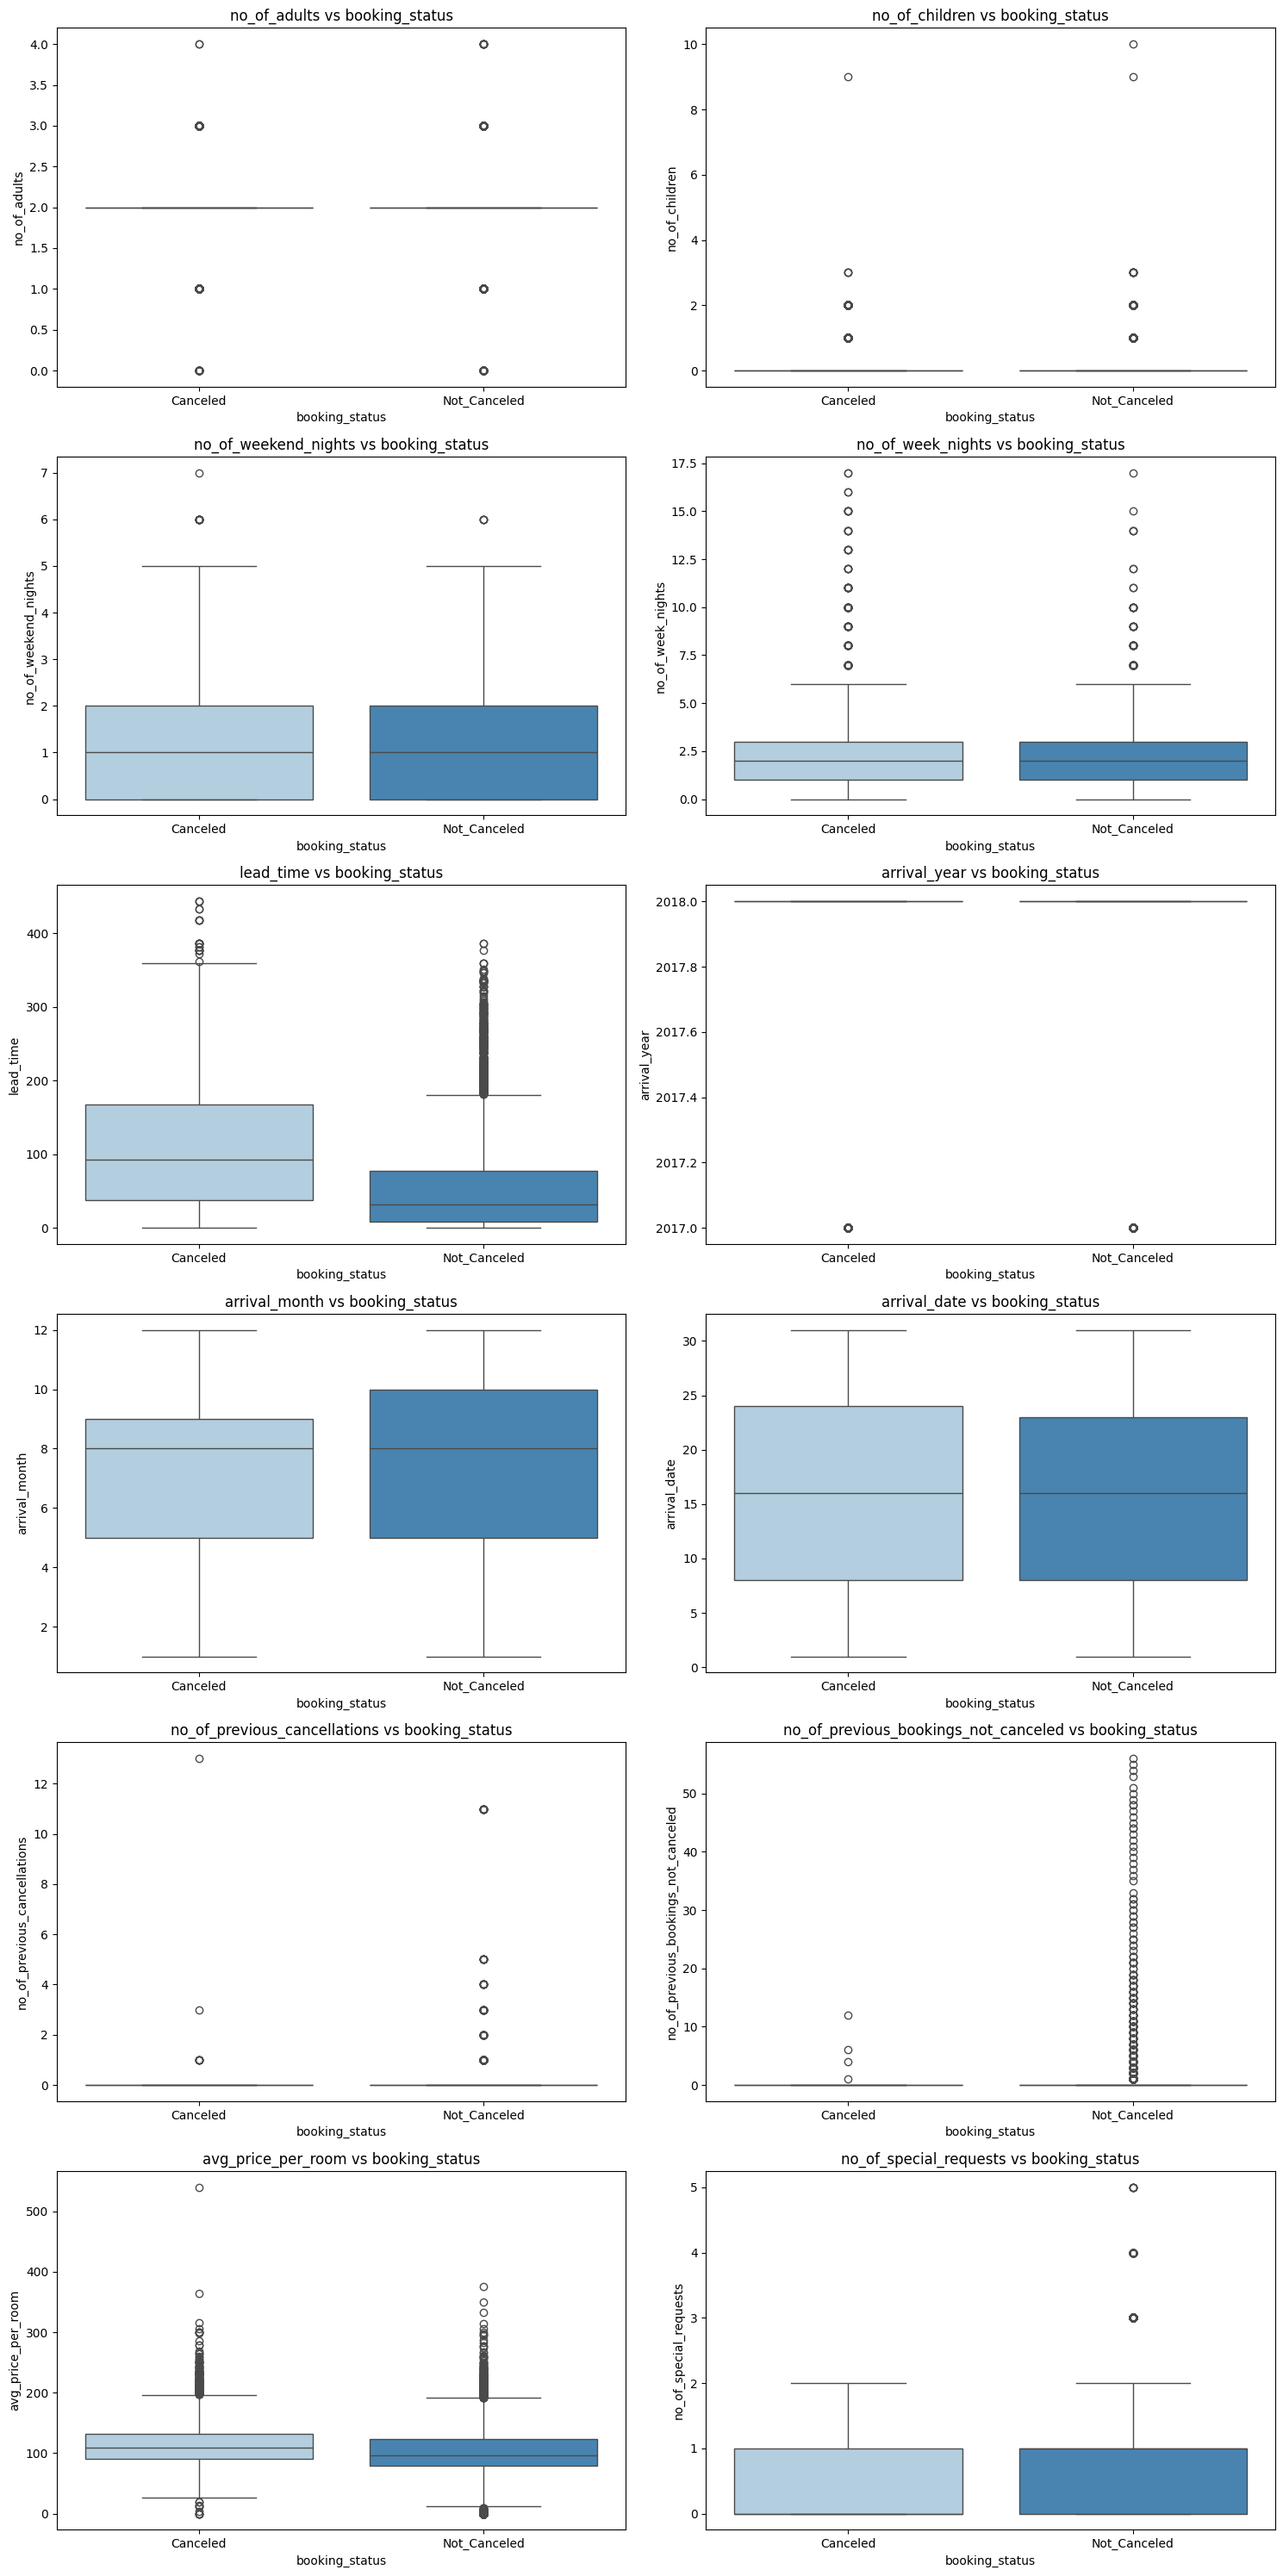

In [62]:
plot_bivariate_num(data, 'booking_status', num_cols)

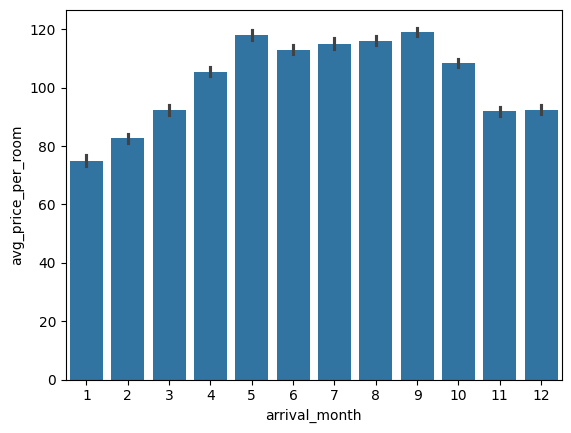

In [63]:
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data)
plt.show()

In [64]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()
    
     

In [65]:
# plot_bivariate_cat(data, "booking_status", cat_cols)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21267 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21267 non-null  int64  
 1   no_of_children                        21267 non-null  int64  
 2   no_of_weekend_nights                  21267 non-null  int64  
 3   no_of_week_nights                     21267 non-null  int64  
 4   type_of_meal_plan                     21267 non-null  object 
 5   required_car_parking_space            21267 non-null  int64  
 6   room_type_reserved                    21267 non-null  object 
 7   lead_time                             21267 non-null  int64  
 8   arrival_year                          21267 non-null  int64  
 9   arrival_month                         21267 non-null  int64  
 10  arrival_date                          21267 non-null  int64  
 11  market_segment_type 

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}



In [69]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21267 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21267 non-null  int64  
 1   no_of_children                        21267 non-null  int64  
 2   no_of_weekend_nights                  21267 non-null  int64  
 3   no_of_week_nights                     21267 non-null  int64  
 4   type_of_meal_plan                     21267 non-null  int64  
 5   required_car_parking_space            21267 non-null  int64  
 6   room_type_reserved                    21267 non-null  int64  
 7   lead_time                             21267 non-null  int64  
 8   arrival_year                          21267 non-null  int64  
 9   arrival_month                         21267 non-null  int64  
 10  arrival_date                          21267 non-null  int64  
 11  market_segment_type 

### Multicollinearity

In [71]:
# !pip install statsmodels

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [73]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data['feature'] = X.columns
vif_data

,feature
0,const
1,no_of_adults
2,no_of_children
3,no_of_weekend_nights
4,no_of_week_nights
5,type_of_meal_plan
6,required_car_parking_space
7,room_type_reserved
8,lead_time
9,arrival_year


In [74]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,4.116301e+07
1,no_of_adults,1.333200e+00
2,no_of_children,1.281656e+00
3,no_of_weekend_nights,1.077619e+00
4,no_of_week_nights,1.127146e+00
5,type_of_meal_plan,1.177470e+00
6,required_car_parking_space,1.032766e+00
7,room_type_reserved,1.549202e+00
8,lead_time,1.407972e+00
9,arrival_year,1.291586e+00


In [75]:
corr = df.corr()
# corr

<Axes: >

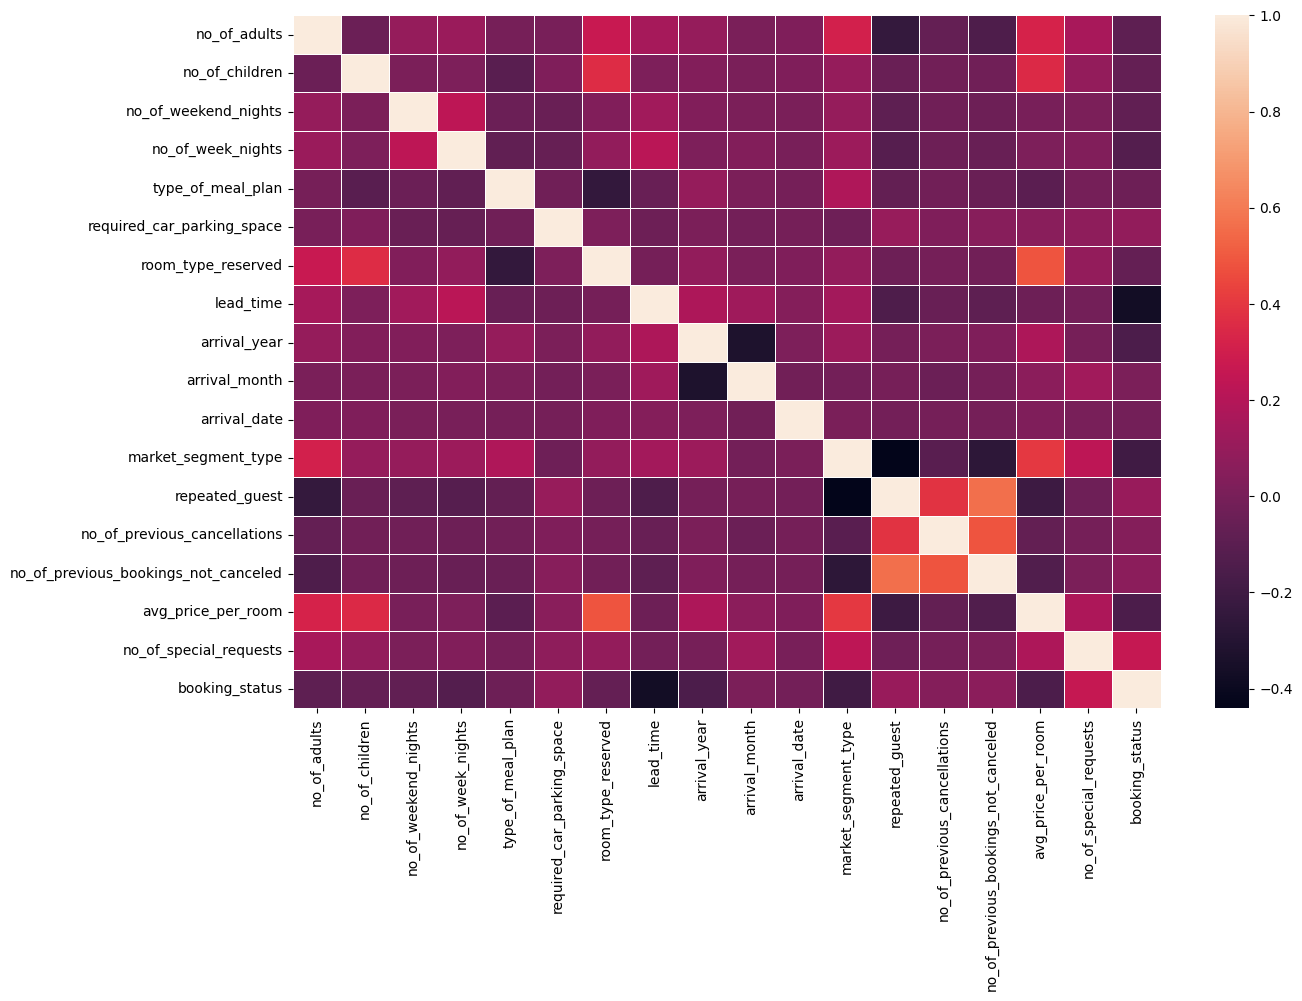

In [76]:
plt.figure(figsize=(14,9))
sns.heatmap(corr, linewidths=0.5)

In [77]:
skewness = df.skew()
skewness

no_of_adults                            -0.295096
no_of_children                           4.204370
no_of_weekend_nights                     0.672804
no_of_week_nights                        1.625109
type_of_meal_plan                        1.633839
required_car_parking_space               4.623724
room_type_reserved                       1.395371
lead_time                                1.403689
arrival_year                            -1.956431
arrival_month                           -0.292490
arrival_date                             0.013292
market_segment_type                     -2.347165
repeated_guest                           5.286654
no_of_previous_cancellations            22.313782
no_of_previous_bookings_not_canceled    16.029862
avg_price_per_room                       0.622060
no_of_special_requests                   0.908130
booking_status                          -0.945765
dtype: float64

In [78]:

for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [79]:
skewness = df.skew()
skewness

no_of_adults                            -0.295096
no_of_children                           4.204370
no_of_weekend_nights                     0.672804
no_of_week_nights                        1.625109
type_of_meal_plan                        1.633839
required_car_parking_space               4.623724
room_type_reserved                       1.395371
lead_time                                1.403689
arrival_year                            -1.956431
arrival_month                           -0.292490
arrival_date                             0.013292
market_segment_type                     -2.347165
repeated_guest                           5.286654
no_of_previous_cancellations            13.185405
no_of_previous_bookings_not_canceled     7.573056
avg_price_per_room                       0.622060
no_of_special_requests                   0.908130
booking_status                          -0.945765
dtype: float64

In [80]:
df['booking_status'].value_counts()

booking_status
1    15179
0     6088
Name: count, dtype: int64

In [81]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [82]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [83]:
# !pip install imbalanced-learn

In [84]:
!pip install scikit-learn==1.3.0

  Using cached scikit-learn-1.3.0.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "C:\Users\user\Documents\mlops-project-1\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "C:\Users\user\Documents\mlops-project-1\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\user\Documents\mlops-project-1\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 175, in prepare_metadata_for_build_wheel
          return hook(metadata_directory, config_settings)
        File "C:\Users\user\AppData\Local

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
smote = SMOTE(random_state=50)

X_res, y_res = smote.fit_resample(X,y)

In [87]:
y_res.value_counts()

booking_status
0    15179
1    15179
Name: count, dtype: int64

In [88]:
X_res.shape

(30358, 17)

In [89]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,3,0,1,2,0,0,3,42,2018,3,18,4,0.000000,0.000000,0.000000,182.7,1,0
1,1,0,0,3,0,0,0,91,2018,9,14,2,0.693147,1.386294,2.772589,65.0,0,1
2,1,0,0,1,0,0,0,33,2018,5,25,4,0.000000,0.000000,0.000000,108.9,0,1
3,1,0,0,2,0,0,3,86,2018,10,26,4,0.000000,0.000000,0.000000,104.4,2,1
4,2,0,0,1,1,0,0,100,2017,10,16,4,0.000000,0.000000,0.000000,108.0,0,0


In [90]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30358 entries, 0 to 30357
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          30358 non-null  int64  
 1   no_of_children                        30358 non-null  int64  
 2   no_of_weekend_nights                  30358 non-null  int64  
 3   no_of_week_nights                     30358 non-null  int64  
 4   type_of_meal_plan                     30358 non-null  int64  
 5   required_car_parking_space            30358 non-null  int64  
 6   room_type_reserved                    30358 non-null  int64  
 7   lead_time                             30358 non-null  int64  
 8   arrival_year                          30358 non-null  int64  
 9   arrival_month                         30358 non-null  int64  
 10  arrival_date                          30358 non-null  int64  
 11  market_segment_

In [91]:
df = balanced_df.copy()
df.shape

(30358, 18)

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [94]:
model = RandomForestClassifier(random_state=50)
model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [95]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,2,0,0,3,42,2018,3,18,4,0.000000,0.000000,0.000000,182.700000,1
1,1,0,0,3,0,0,0,91,2018,9,14,2,0.693147,1.386294,2.772589,65.000000,0
2,1,0,0,1,0,0,0,33,2018,5,25,4,0.000000,0.000000,0.000000,108.900000,0
3,1,0,0,2,0,0,3,86,2018,10,26,4,0.000000,0.000000,0.000000,104.400000,2
4,2,0,0,1,1,0,0,100,2017,10,16,4,0.000000,0.000000,0.000000,108.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30353,2,1,1,1,0,0,4,217,2018,8,26,3,0.000000,0.000000,0.000000,168.549868,0
30354,2,0,0,1,0,0,3,60,2018,9,4,4,0.000000,0.000000,0.000000,122.169112,1
30355,2,0,0,1,0,0,2,31,2018,2,25,4,0.000000,0.000000,0.000000,121.290597,0
30356,1,0,1,3,0,0,1,81,2018,4,25,4,0.000000,0.000000,0.000000,107.503870,0


In [96]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}
)
feature_importance_df

,feature,importance
0,no_of_adults,0.018380
1,no_of_children,0.006868
2,no_of_weekend_nights,0.029978
3,no_of_week_nights,0.045528
4,type_of_meal_plan,0.020350
5,required_car_parking_space,0.010718
6,room_type_reserved,0.018685
7,lead_time,0.266202
8,arrival_year,0.016155
9,arrival_month,0.088733


In [97]:
top_features_importance_df = feature_importance_df.sort_values(by=['importance'], ascending=False)

In [98]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [99]:
df.shape

(30358, 18)

In [100]:
top_10_features = top_features_importance_df['feature'].head(10).values
top_10_df = df[top_10_features.tolist() + ["booking_status"]]
top_10_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,42,1,182.700000,3,18,4,2,1,0,3,0
1,91,0,65.000000,9,14,2,3,0,0,0,1
2,33,0,108.900000,5,25,4,1,0,0,0,1
3,86,2,104.400000,10,26,4,2,0,0,3,1
4,100,0,108.000000,10,16,4,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30353,217,0,168.549868,8,26,3,1,1,0,4,0
30354,60,1,122.169112,9,4,4,1,0,0,3,0
30355,31,0,121.290597,2,25,4,1,0,0,2,0
30356,81,0,107.503870,4,25,4,3,1,0,1,0


In [101]:
df = top_10_df.copy()

In [102]:
# !pip install xgboost lightgbm

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [105]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=50),
    "Logistic Regression": LogisticRegression(random_state=50),
    "Gradient Boosting": GradientBoostingClassifier(random_state=50),
    "Support Vector Classifier": SVC(random_state=50),
    "Decision Tree": DecisionTreeClassifier(random_state=50),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGBoost" : XGBClassifier(random_state=50),
    "Adaboost": AdaBoostClassifier(random_state=50),
    "LGBM": LGBMClassifier(random_state=50)

}

In [106]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [107]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

[LightGBM] [Info] Number of positive: 12189, number of negative: 12097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 24286, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501894 -> initscore=0.007576
[LightGBM] [Info] Start training from score 0.007576


In [113]:
metrics_df = pd.DataFrame(metrics)
metrics_df.sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.892128,0.888003,0.893645,0.890815
7,XGBoost,0.878623,0.871905,0.883278,0.877554
9,LGBM,0.869730,0.855940,0.884281,0.869880
4,Decision Tree,0.844532,0.845142,0.837793,0.841451
2,Gradient Boosting,0.839427,0.821782,0.860535,0.840712
8,Adaboost,0.801877,0.801552,0.794314,0.797917
1,Logistic Regression,0.786561,0.784228,0.781605,0.782915
5,KNN,0.784091,0.850815,0.680936,0.756456
3,Support Vector Classifier,0.663702,0.628945,0.773244,0.693669
6,Naive Bayes,0.583169,0.887015,0.175920,0.293609


In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [115]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [117]:
rf = RandomForestClassifier(random_state=50)

params_dist = {
    'n_estimators': randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,5),
    'bootstrap': [True, False]
}

In [118]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=50,
    scoring='accuracy'
)

In [119]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=42, min_samples_leaf=4, min_samples_split=7, n_estimators=389; total time=   5.3s
[CV] END bootstrap=True, max_depth=42, min_samples_leaf=4, min_samples_split=7, n_estimators=389; total time=   5.0s
[CV] END bootstrap=True, max_depth=42, min_samples_leaf=4, min_samples_split=7, n_estimators=389; total time=   5.2s
[CV] END bootstrap=True, max_depth=42, min_samples_leaf=4, min_samples_split=7, n_estimators=389; total time=   7.0s
[CV] END bootstrap=True, max_depth=42, min_samples_leaf=4, min_samples_split=7, n_estimators=389; total time=   6.3s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=3, min_samples_split=7, n_estimators=170; total time=   1.9s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=3, min_samples_split=7, n_estimators=170; total time=   2.0s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=3, min_samples_split=7, n_estimators=170; total time=   1.9s
[CV]

,estimator,RandomForestC...ndom_state=50)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....0022C8BF71D10>, 'min_samples_leaf': <scipy.stats....0022C8BF36D70>, 'min_samples_split': <scipy.stats....0022C8BF71F90>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,50
,error_score,nan


In [120]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 36,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 399}

In [121]:
best_rf_model = random_search.best_estimator_

In [122]:
y_pred = best_rf_model.predict(X_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [126]:
accuracy, recall, precision, f1

(0.8812582345191041, 0.888628762541806, 0.8725779967159277, 0.8805302402651202)

In [127]:
import joblib

In [128]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [129]:
loaded_model = joblib.load("random_forest.pkl")
loaded_model

,n_estimators,399
,criterion,'gini'
,max_depth,36
,min_samples_split,8
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False
